In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Import and Clean Data #

In [2]:
df = pd.read_csv('./data/data.csv')

In [3]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

Below, checking value counts for categorical variables will tell us what values they can take and whether any of the values look like errors.

In [4]:
df['action_type'].value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [5]:
df['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

In [6]:
df['season'].value_counts()

2005-06    2318
2008-09    2242
2002-03    2241
2007-08    2153
2009-10    2080
2001-02    2028
2006-07    1887
2000-01    1868
2010-11    1825
2003-04    1638
2011-12    1637
2012-13    1593
1999-00    1577
2004-05    1324
2015-16    1113
1997-98     989
1998-99     921
2014-15     713
1996-97     477
2013-14      73
Name: season, dtype: int64

In [7]:
df['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [8]:
df['shot_zone_area'].value_counts()

Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64

In [9]:
df['shot_zone_basic'].value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

In [10]:
df['shot_zone_range'].value_counts()

Less Than 8 ft.    9398
16-24 ft.          8315
8-16 ft.           6626
24+ ft.            6275
Back Court Shot      83
Name: shot_zone_range, dtype: int64

In [11]:
df['team_name'].value_counts()

Los Angeles Lakers    30697
Name: team_name, dtype: int64

In [12]:
df['game_date'].value_counts()

2016-04-13    50
2002-11-07    47
2006-01-22    46
2006-12-29    45
2008-01-14    44
              ..
1997-02-21     1
1996-12-10     1
1996-11-05     1
1997-04-25     1
1996-11-29     1
Name: game_date, Length: 1559, dtype: int64

In [13]:
df['matchup'].value_counts()

LAL @ SAS      1020
LAL vs. SAS     936
LAL @ SAC       889
LAL vs. HOU     878
LAL @ DEN       873
               ... 
LAL @ PHO        33
LAL vs. NOP      27
LAL vs. SAN      22
LAL @ UTH        21
LAL vs. BKN      15
Name: matchup, Length: 74, dtype: int64

In [14]:
df['opponent'].value_counts()

SAS    1978
PHX    1781
HOU    1666
SAC    1643
DEN    1642
POR    1539
UTA    1490
MIN    1474
GSW    1356
LAC    1285
DAL    1199
MEM    1030
BOS     946
SEA     828
IND     761
PHI     720
ORL     719
DET     715
OKC     677
TOR     664
NYK     657
MIA     627
CHA     620
CLE     619
CHI     610
WAS     600
MIL     586
NOH     581
NJN     520
ATL     519
NOP     344
VAN     246
BKN      55
Name: opponent, dtype: int64

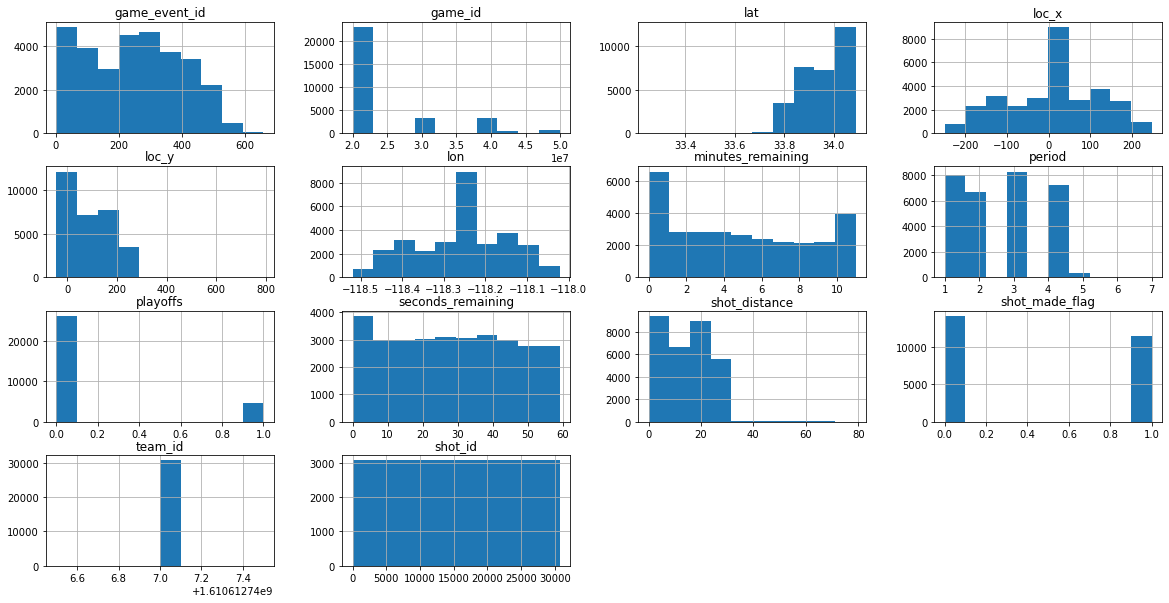

In [15]:
df.hist(figsize=(20,10));

Based on the histograms, none of the values look like errors or major outliers.  We can see that team_id will not be useful in this model.

In [16]:
df['lat'].value_counts()

34.0443    5599
34.0373     246
34.0323     225
34.0413     218
34.0293     211
           ... 
33.4523       1
33.6023       1
33.5723       1
33.7453       1
33.4973       1
Name: lat, Length: 457, dtype: int64

It looks like latititude and longitude are telling us the stadium location, which isn't very useful when we already know the opponent and whether a game was home or away.

In [17]:
df.isna().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [18]:
df.dropna(inplace=True)

The data looks completely clean.  The 5000 null are for Kaggle submissions and will be dropped for now.

In [19]:
df.isna().sum()

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

# EDA #

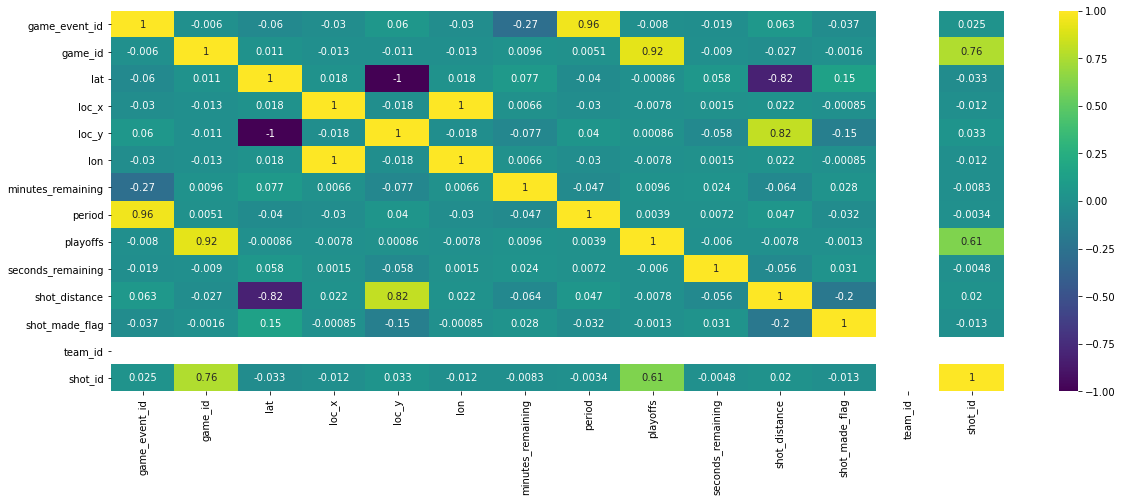

In [20]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis');

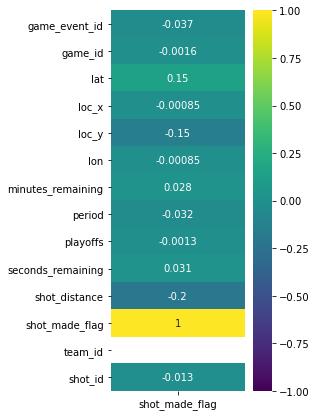

In [21]:
plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[['shot_made_flag']], vmin=-1, vmax=1, annot=True, cmap='viridis');

Very few correlations here look strong enough to be a problem, except the distance variables, which is expected.  No one variable is strongly correlated with the target variable.

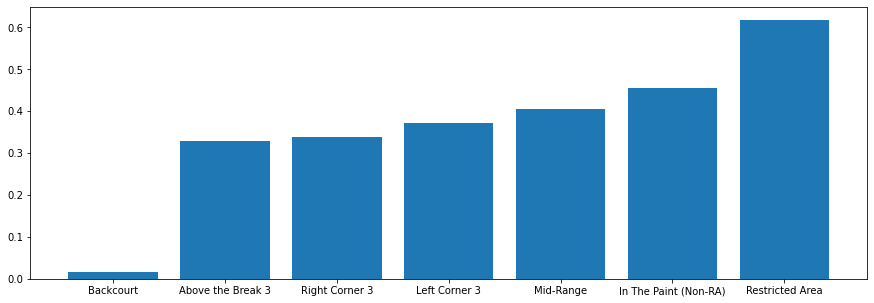

In [22]:
plt.figure(figsize=(15,5))
plt.bar(df['shot_made_flag'].groupby(df['shot_zone_basic']).mean().sort_values().index, df['shot_made_flag'].groupby(df['shot_zone_basic']).mean().sort_values());

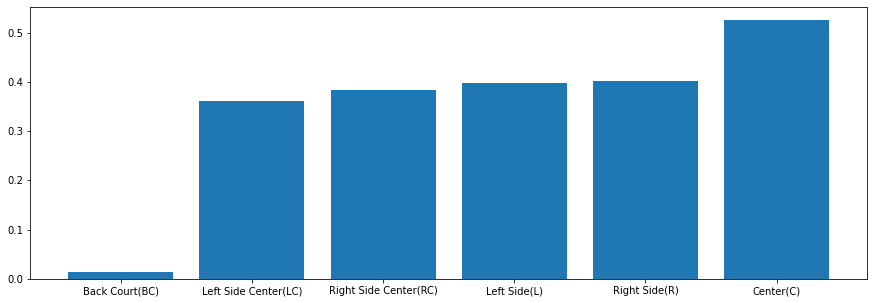

In [23]:
plt.figure(figsize=(15,5))
plt.bar(df['shot_made_flag'].groupby(df['shot_zone_area']).mean().sort_values().index, df['shot_made_flag'].groupby(df['shot_zone_area']).mean().sort_values());

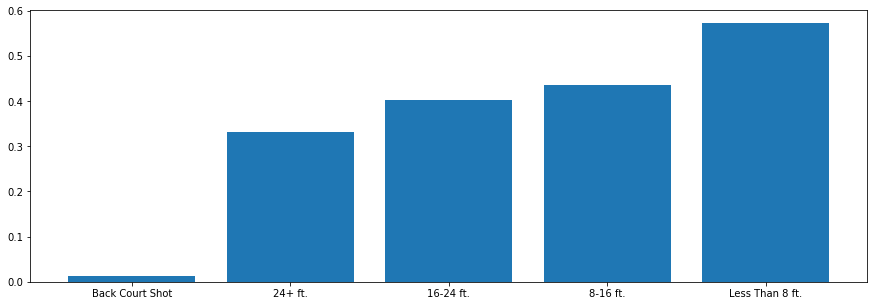

In [24]:
plt.figure(figsize=(15,5))
plt.bar(df['shot_made_flag'].groupby(df['shot_zone_range']).mean().sort_values().index, df['shot_made_flag'].groupby(df['shot_zone_range']).mean().sort_values());

These graphs show how successful Kobe Bryant was when shooting from different areas.  For the most part, he was most successful when shooting from close range and center.  These look like useful features for the model.

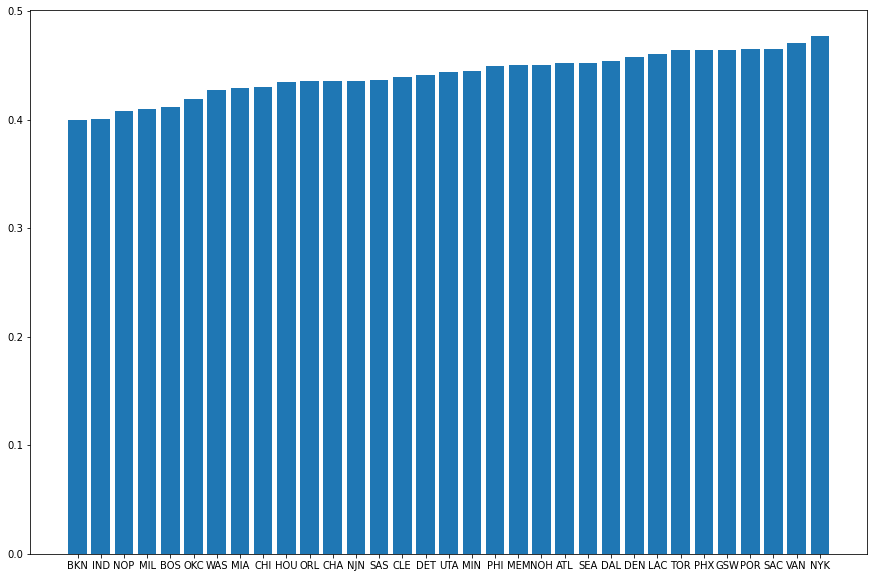

In [25]:
plt.figure(figsize=(15,10))
plt.bar(df['shot_made_flag'].groupby(df['opponent']).mean().sort_values().index, df['shot_made_flag'].groupby(df['opponent']).mean().sort_values());

This shows some difference in how Kobe performed against different teams.  This could be a useful feature to include.

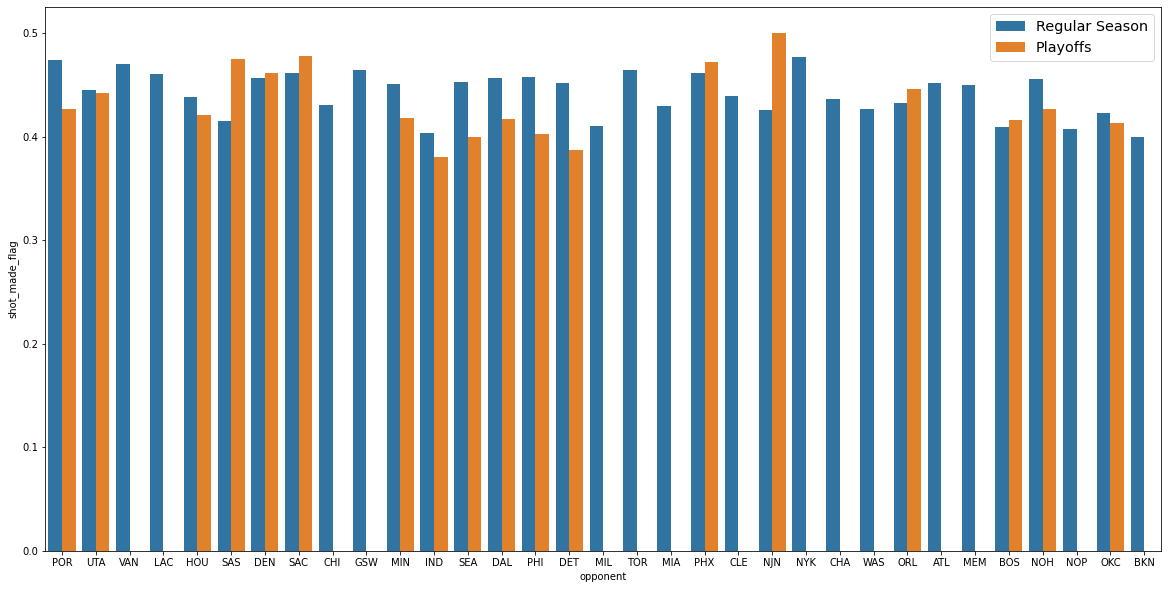

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='opponent', y='shot_made_flag', hue="playoffs", data=df, ci=None)
plt.legend(['Regular Season', 'Playoffs'], loc='upper right', fontsize='x-large');

In [27]:
df['shot_made_flag'].groupby(df['playoffs']).mean()

playoffs
0    0.446420
1    0.444651
Name: shot_made_flag, dtype: float64

This graph shows Kobe's performance against different teams in the regular season vs playoffs.  There is some difference, but the difference depends on the team he was playing.  Overall, his shot percentage was the same in the regular season and playoffs.  This may or may not be useful.

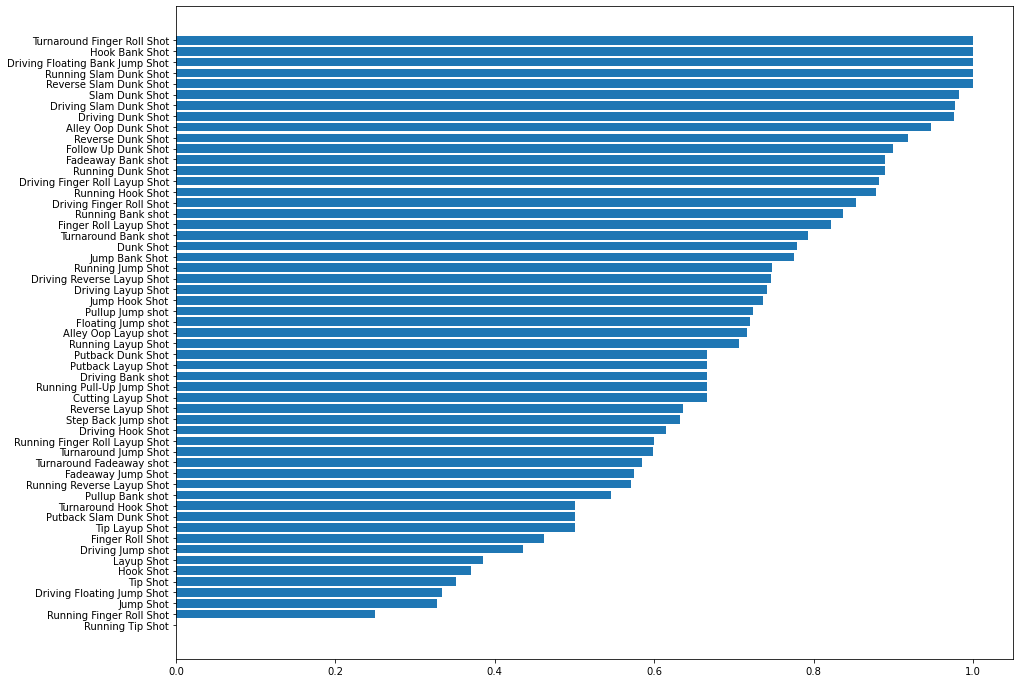

In [28]:
plt.figure(figsize=(15,12))
plt.barh(df['shot_made_flag'].groupby(df['action_type']).mean().sort_values().index,
         df['shot_made_flag'].groupby(df['action_type']).mean().sort_values());

This graph shows Kobe's success rate on each type of shot.

In [29]:
# This function will be used to identify home and road games.
def home_games(matchup):
    if 'vs' in matchup:
        return 1
    else:
        return 0

df['home_game'] = df['matchup'].apply(home_games)

In [30]:
df['shot_made_flag'].groupby(df['home_game']).mean()

home_game
0    0.436421
1    0.456468
Name: shot_made_flag, dtype: float64

His shot percentage is a bit higher at home.

In [31]:
df['game_date'] = pd.to_datetime(df['game_date'])

In [32]:
df['game_date'].head()

1   2000-10-31
2   2000-10-31
3   2000-10-31
4   2000-10-31
5   2000-10-31
Name: game_date, dtype: datetime64[ns]

In [33]:
def get_month(date):
    return date.month

def get_day(date):
    return date.day

df['month'] = df['game_date'].apply(get_month)
df['day'] = df['game_date'].apply(get_day)

In [34]:
df['day_of_year'] = df['month']+df['day']/31

Converted the time to day of the year on a scale where January games are between 1 and 2, February between 2 and 3, etc.

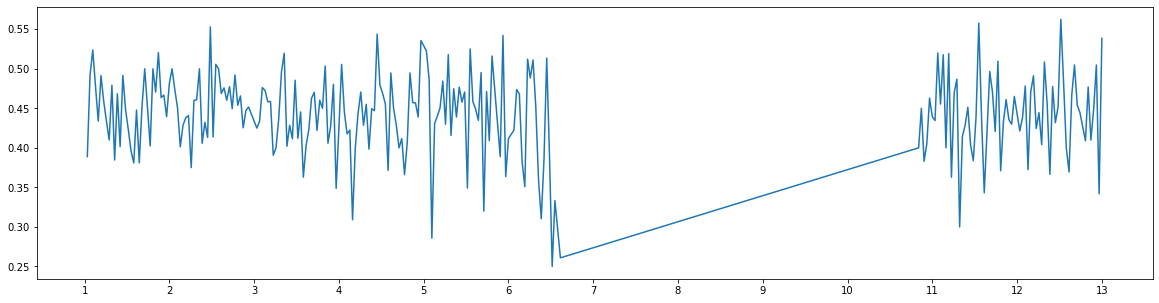

In [35]:
plt.figure(figsize=(20,5))
plt.plot(df['shot_made_flag'].groupby(df['day_of_year']).mean().index, df['shot_made_flag'].groupby(df['day_of_year']).mean())
plt.xticks(np.linspace(1,13,13));

We don't see very much relationship between shot percentage and day of the year.

# Model #

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Feature Selection and Engineering ###

In [37]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'home_game', 'month', 'day', 'day_of_year'],
      dtype='object')

In [38]:
df['time_left'] = df['seconds_remaining'] + df['minutes_remaining'] * 60

In [39]:
df = pd.get_dummies(data=df, columns=['shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'action_type', 'period', 'opponent'], drop_first=True)

In [40]:
model_features = ['playoffs', 'time_left', 'home_game', 'day_of_year']
for col in df.columns:
    if 'shot_zone' in col:
        model_features.append(col)
    elif 'action_type' in col:
        model_features.append(col)
    elif 'period' in col:
        model_features.append(col)
    elif 'opponent' in col:
        model_features.append(col)

In [41]:
model_features

['playoffs',
 'time_left',
 'home_game',
 'day_of_year',
 'shot_zone_area_Center(C)',
 'shot_zone_area_Left Side Center(LC)',
 'shot_zone_area_Left Side(L)',
 'shot_zone_area_Right Side Center(RC)',
 'shot_zone_area_Right Side(R)',
 'shot_zone_basic_Backcourt',
 'shot_zone_basic_In The Paint (Non-RA)',
 'shot_zone_basic_Left Corner 3',
 'shot_zone_basic_Mid-Range',
 'shot_zone_basic_Restricted Area',
 'shot_zone_basic_Right Corner 3',
 'shot_zone_range_24+ ft.',
 'shot_zone_range_8-16 ft.',
 'shot_zone_range_Back Court Shot',
 'shot_zone_range_Less Than 8 ft.',
 'action_type_Alley Oop Layup shot',
 'action_type_Cutting Layup Shot',
 'action_type_Driving Bank shot',
 'action_type_Driving Dunk Shot',
 'action_type_Driving Finger Roll Layup Shot',
 'action_type_Driving Finger Roll Shot',
 'action_type_Driving Floating Bank Jump Shot',
 'action_type_Driving Floating Jump Shot',
 'action_type_Driving Hook Shot',
 'action_type_Driving Jump shot',
 'action_type_Driving Layup Shot',
 'action_t

### Setting X and y and Train/Test/Split ###

In [42]:
df_by_date = df.sort_values('game_date').copy()
X = df_by_date[model_features]
y = df_by_date['shot_made_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=0.7, random_state=0)

### Baseline Scores ###

In [43]:
1 - y_train.mean()

0.5467281925835326

In [44]:
1 - y_test.mean()

0.5704280155642023

*The baseline score for our test data is about 57%, because we would be right 57% of the time if we guessed that he missed every shot.*

### Random Forest Model ###

In [45]:
pipe = Pipeline([
    ('sc', StandardScaler()),
#     ('poly', PolynomialFeatures()),
    ('forest', RandomForestClassifier(random_state=42))
])

In [46]:
pipe_params = {
#     'logreg__C' : [1]
    'forest__n_estimators' : [100]
}

In [47]:
gs = GridSearchCV(pipe, pipe_params, cv=5, n_jobs=-1)

In [48]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('forest',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1, param_grid={'forest__n_estimators': [100]})

In [49]:
gs.score(X_train, y_train)

1.0

In [50]:
gs.score(X_test, y_test)

0.6411154345006486

In [51]:
pd.DataFrame(zip(model_features, gs.best_estimator_[1].feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

,feature,importance
1,time_left,0.256259
3,day_of_year,0.198705
43,action_type_Jump Shot,0.054926
2,home_game,0.031180
74,period_3,0.025198
...,...,...
60,action_type_Running Pull-Up Jump Shot,0.000000
20,action_type_Cutting Layup Shot,0.000000
79,opponent_BKN,0.000000
62,action_type_Running Slam Dunk Shot,0.000000


### Logistic Regression Model ###

In [52]:
pipe = Pipeline([
    ('sc', StandardScaler()),
#     ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=10_000))
])

In [53]:
pipe_params = {
    'logreg__C' : [1]
}

In [54]:
gs = GridSearchCV(pipe, pipe_params, cv=5, n_jobs=-1)

In [55]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1, param_grid={'logreg__C': [1]})

In [56]:
gs.score(X_train, y_train)

0.6846611441596708

In [57]:
gs.score(X_test, y_test)

0.6740596627756161

In [58]:
pd.DataFrame(zip(model_features, gs.best_estimator_[1].coef_[0]), columns=['feature', 'coef']).sort_values(by='coef', ascending=False)

,feature,coef
13,shot_zone_basic_Restricted Area,0.208064
23,action_type_Driving Finger Roll Layup Shot,0.206280
64,action_type_Slam Dunk Shot,0.166242
33,action_type_Fadeaway Bank shot,0.147701
52,action_type_Reverse Slam Dunk Shot,0.101213
...,...,...
17,shot_zone_range_Back Court Shot,-0.300079
72,action_type_Turnaround Jump Shot,-0.330695
29,action_type_Driving Layup Shot,-0.414665
44,action_type_Layup Shot,-0.914724


In [59]:
def check_metrics(estimator, X_train, X_test, y_train, y_test):
    
    """
    Given an estimator, the data it was trained on, and corresponding test data, displays the following for both Train and Test:
    Classification report
    ROC AUC score
    ROC AUC curve
    Confustion Matrix
    NOTE: Futurology and Science labels are currently hard-coded.  Should be changed to function parameters before more general use.
    """
    
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    print('Train Data Metrics:\n')
    print(classification_report(y_train, train_preds, target_names=['Missed', 'Made'], digits=4))
    print(f'ROC AUC score: {roc_auc_score(y_train, train_preds)}')
    
    print('\n*************************\n')

    print('Test Data Metrics:\n')
    print(classification_report(y_test, test_preds, target_names=['Missed', 'Made'], digits=4))
    print(f'ROC AUC score: {roc_auc_score(y_test, test_preds)}')
    
    print('\n*************************\n')
    
    fig, axs = plt.subplots(2, 2, figsize = (15,10))
    
    RocCurveDisplay.from_predictions(y_train, train_preds, ax=axs[0,0])
    axs[0,0].set_title('Train Data ROC Curve', fontsize='x-large')
    
    ConfusionMatrixDisplay.from_predictions(y_train, train_preds, display_labels=['Missed', 'Made'], ax=axs[0,1])
    axs[0,1].set_title('Train Data Confusion Matrix', fontsize='x-large')
    
    RocCurveDisplay.from_predictions(y_test, test_preds, ax=axs[1,0])
    axs[1,0].set_title('Test Data ROC Curve', fontsize='x-large')

    ConfusionMatrixDisplay.from_predictions(y_test, test_preds, display_labels=['Missed', 'Made'], ax=axs[1,1])
    axs[1,1].set_title('Test Data Confustion Matrix', fontsize='x-large')

In [60]:
check_metrics(logreg, X_train, X_test, y_train, y_test)

NameError: name 'logreg' is not defined

In [61]:
mnb = MultinomialNB()

In [62]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [63]:
mnb.score(X_train, y_train)

0.6404625562906544

In [64]:
mnb.score(X_test, y_test)

0.6477302204928664

In [66]:
sv = SVC()

In [67]:
sv.fit(X_train, y_train)

SVC()

In [68]:
sv.score(X_train, y_train)

0.5467281925835326

In [69]:
sv.score(X_test, y_test)

0.5704280155642023